# Web Ad Optimization Using Upper Bound Confidence- Reinforcement Learning

* Import Libraries

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math

* Load Dataset

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Science\Machine Learning\25_WebAdOptimization_UpperConfidenceBound_ReinforcementLearning\dataset.csv')

* Summarize Dataset

In [3]:
print(df.shape)
print(df.head())
print(df.isnull().any())
print(df.describe())

(10000, 10)
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0
Ad 1     False
Ad 2     False
Ad 3     False
Ad 4     False
Ad 5     False
Ad 6     False
Ad 7     False
Ad 8     False
Ad 9     False
Ad 10    False
dtype: bool
               Ad 1          Ad 2          Ad 3          Ad 4          Ad 5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.170300      0.129500      0.072800      0.119600      0.269500   
std        0.375915      0.335769      0.259821      0.324509      0.443722   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      

* UPPER CONFIDENCE BOUND

In [8]:
import math
observation=10000
no_of_Ads=10
Ads_selected=[]
number_of_selection_of_each_ads=[0]*no_of_Ads

sums_of_rewards_of_each_ads=[0]*no_of_Ads

total_reward=0
for n in range(0,observation):
    ad=0
    max_upper_bound=0
    for i in range(0,no_of_Ads):
        if (number_of_selection_of_each_ads[i]>0):
            average_reward=sums_of_rewards_of_each_ads[i]/number_of_selection_of_each_ads[i]
            delta_i=math.sqrt(3/2 *math.log(n+1)/number_of_selection_of_each_ads[i])
            upper_bound = average_reward + delta_i
            
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    Ads_selected.append(ad)
    number_of_selection_of_each_ads[ad]=number_of_selection_of_each_ads[ad]+1
    reward=df.values[n,ad]
    
    sums_of_rewards_of_each_ads[ad]=sums_of_rewards_of_each_ads[ad]+reward
    total_reward=total_reward +reward

print('Reward by Ads=',sums_of_rewards_of_each_ads)
print('Total reward by UCB',total_reward)
print('Ads selected at each round: ',Ads_selected)

Reward by Ads= [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
Total reward by UCB 2178
Ads selected at each round:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 

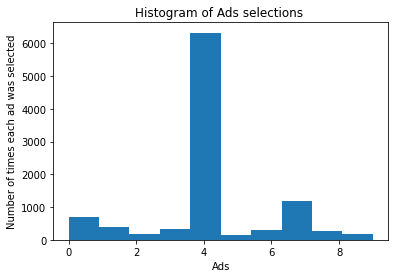

In [9]:
plt.hist(Ads_selected)
plt.title('Histogram of Ads selections ')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()